In [1]:
from dolfin import *

In [11]:
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)

In [12]:
# Definim de les condicions de contorn de tipus Dirichlet
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

In [13]:
# Definim les condicions de contorn
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

In [14]:
# Transformem el problema diferencial a un variacional
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("sin(5*x[0])", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

In [15]:
# Resolem el problema
u = Function(V)
solve(a == L, u, bc)

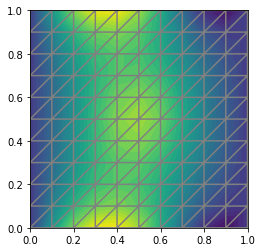

In [16]:
# Fem un plot de la solució
import matplotlib.pyplot as plt
plot(u)
plot(mesh)
plt.show()

In [9]:
# Guardem la solució
file = File("demo_poisson.pvd")
file << u